請輸入想調查的站點:復興北路479巷-民族東路


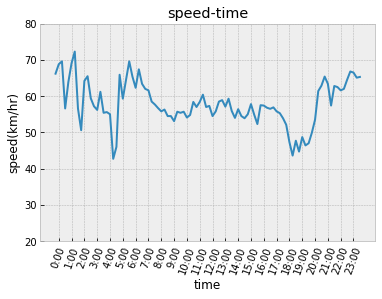

In [12]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

def plot1(road):
    scope = ['https://spreadsheets.google.com/feeds',
             'https://www.googleapis.com/auth/drive']
    credentials = ServiceAccountCredentials.from_json_keyfile_name('C:\\Users\\j8862\\OneDrive\\Desktop\\datascience\\googlesheet.json', scope)
    gc = gspread.authorize(credentials)
    # Open a worksheet from spreadsheet with one shot
    sh = gc.open_by_url('https://docs.google.com/spreadsheets/d/1FJPf9S2vpimDZvefrpnfq31cq3JpmySHse74WQoEgu4/edit?ts=5c8895e5#gid=618695640')
    wks4 = sh.worksheet("復興南北路")

    time = wks4.col_values(3)
    st =[]
    st2=[]
    
    time.pop(0)
    time.pop(0)
    time.pop(0)
    cell = wks4.find(road)
    speed = wks4.col_values(cell.col)
    speed.pop(0)
    speed.pop(0)
    speed.pop(0)

    plt.style.use('bmh')
    fig = plt.figure()
    ax = plt.axes()

    stnum=[]
    for i in range(len(speed)):
        stnum.append(eval(speed[i].strip('Km/hr')))
    plt.plot(stnum)
    timex=[]
    for j in range(1,len(time),4):
        a = time[j-1].split('~')
        timex.append(a[0])
    plt.xticks(range(0,len(time),4),timex, rotation=70)
    plt.ylim(20, 80)
    plt.title("speed-time")
    plt.ylabel("speed(km/hr)")
    plt.xlabel("time")

    fig.savefig(road+'.png')
    plt.show()
    return 

n=input('請輸入想調查的站點:')
plot1(n)
